In [1]:
!pip install -q ultralytics kagglehub opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00


In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("jockeroika/human-bone-fractures-image-dataset")
print("Dataset path:", path)

# Set dataset root
DATASET_PATH = os.path.join(
    path,
    "Human Bone Fractures Multi-modal Image Dataset (HBFMID)",
    "Bone Fractures Detection"
)

print(os.listdir(DATASET_PATH))

Using Colab cache for faster access to the 'human-bone-fractures-image-dataset' dataset.
Dataset path: /kaggle/input/human-bone-fractures-image-dataset
['README.roboflow.txt', 'data.yaml', 'valid', 'test', 'train']


In [3]:
#STEP 3: Create YOLO Dataset YAML
import yaml

data_yaml = {
    "path": DATASET_PATH,
    "train": "train/images",
    "val": "valid/images",
    "test": "test/images",
    "names": {
        0: "fracture"
    }
}

with open("bone_fracture.yaml", "w") as f:
    yaml.dump(data_yaml, f)

print("bone_fracture.yaml created")

bone_fracture.yaml created


In [4]:
#STEP 4: Train YOLO Model
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="bone_fracture.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device="cpu"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bone_fracture.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, ko

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccef5b4f590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run validation
metrics = model.val()

# Correct metric extraction (YOLOv8.3+)
precision = metrics.box.mp
recall = metrics.box.mr
map50 = metrics.box.map50
map5095 = metrics.box.map
f1_score = metrics.box.f1.mean()  # average F1 across classes

# Print results
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1_score:.4f}")
print(f"mAP@50    : {map50:.4f}")
print(f"mAP@50:95 : {map5095:.4f}")

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.3 ms, read: 91.9±25.7 MB/s, size: 28.5 KB)
val: Scanning /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/labels... 128 images, 0 backgrounds, 114 corrupt: 100% ━━━━━━━━━━━━ 128/128 667.8it/s 0.2s
val: /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/102_jpg.rf.2a24ccdf9a3242177f430875fe80a0c0.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/105_jpg.rf.5c99acc90505e030b2a7da08487bd8fc.jpg: ignoring corr


0: 640x640 (no detections), 198.9ms
1: 640x640 (no detections), 198.9ms
2: 640x640 (no detections), 198.9ms
Speed: 2.5ms preprocess, 198.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


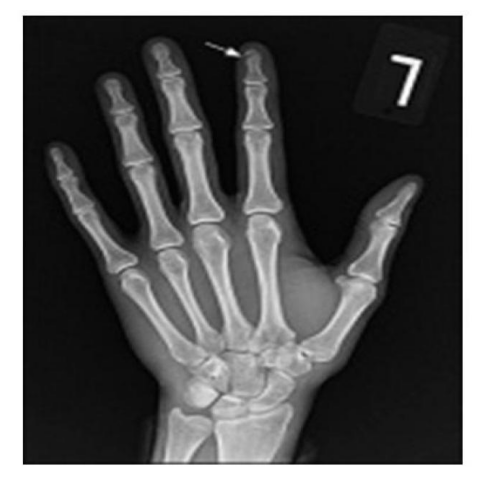

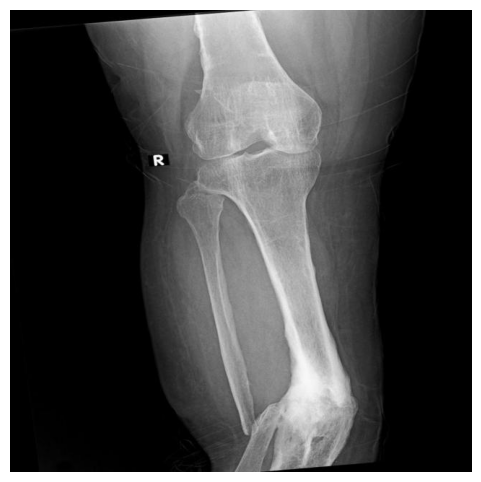

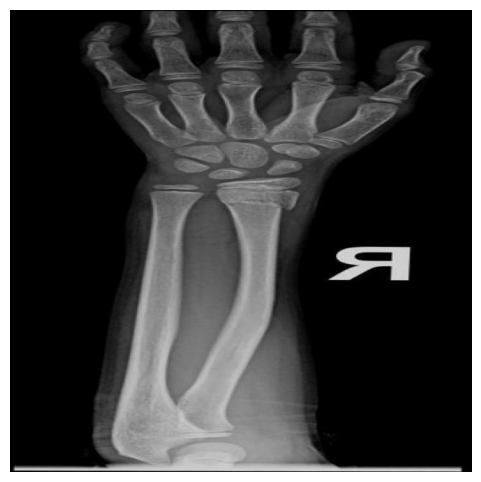

In [8]:
#STEP 6: Visualize Predictions (Bounding Boxes)
import matplotlib.pyplot as plt
import cv2
import glob

test_images = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")

results = model.predict(test_images[:3], conf=0.4)

for r in results:
    img = r.plot()
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

In [12]:
import gradio as gr
import cv2
import numpy as np
from ultralytics import YOLO

# --------------------------------------------------
# Load TRAINED YOLO model (use best.pt, NOT yolov8n.pt)
# --------------------------------------------------
model = YOLO("runs/detect/train/weights/best.pt")

def fracture_detector(image):
    """
    image: PIL image from Gradio
    """

    # Convert PIL → OpenCV
    img = np.array(image)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # 🔥 IMPORTANT FIXES:
    # - Low confidence threshold
    # - Allow multiple detections
    results = model.predict(
        img,
        conf=0.05,      # 🔥 lower confidence for medical images
        iou=0.4,
        max_det=5,
        verbose=False
    )

    # Check detections
    boxes = results[0].boxes
    fractured = boxes is not None and len(boxes) > 0

    # Draw bounding boxes + confidence
    annotated_img = results[0].plot(
        labels=True,
        conf=True,
        line_width=3
    )

    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Diagnosis logic
    diagnosis = (
        "🟥 Fracture Detected"
        if fractured
        else "🟩 No Fracture Detected"
    )

    return annotated_img, diagnosis


# --------------------------------------------------
# Gradio Interface
# --------------------------------------------------
demo = gr.Interface(
    fn=fracture_detector,
    inputs=gr.Image(type="pil", label="Upload X-ray Image"),
    outputs=[
        gr.Image(label="Detection Result"),
        gr.Textbox(label="Diagnosis")
    ],
    title="Bone Fracture Detection System (YOLOv8)",
    description=(
        "Real-time bone fracture detection using a YOLOv8 model trained on "
        "X-ray images. The system highlights fracture regions with bounding boxes."
    )
)

# Launch app
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://68045d1086abfdb31b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
